In [126]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
%matplotlib inline

In [127]:
train_path='/Users/sam/Desktop/Deep Learning/assignments/cnnjupyter/train'
test_path='/Users/sam/Desktop/Deep Learning/assignments/cnnjupyter/test'
valid_path='/Users/sam/Desktop/Deep Learning/assignments/cnnjupyter/validation'

In [128]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)

Found 62 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [129]:
imgs,labels = next(train_batches)

In [130]:
imgs.shape

(10, 224, 224, 3)

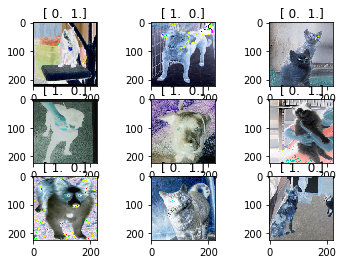

In [131]:
for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(imgs[i,:,:,:]);
    plt.title(labels[i])
        

In [132]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from keras.layers.convolutional import *
import itertools

In [133]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Conv2D(32,(3,3)),
    Flatten(),
    Dense(2,activation='softmax'),
])

In [134]:
model.compile(Adam(lr=.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [135]:
model.fit_generator(train_batches,steps_per_epoch=6,epochs=5,verbose=2)

Epoch 1/5
4s - loss: 7.7141 - acc: 0.5170
Epoch 2/5
4s - loss: 8.0590 - acc: 0.5000
Epoch 3/5
4s - loss: 8.3336 - acc: 0.4830
Epoch 4/5
4s - loss: 8.6081 - acc: 0.4659
Epoch 5/5
4s - loss: 6.4118 - acc: 0.6022


Predict

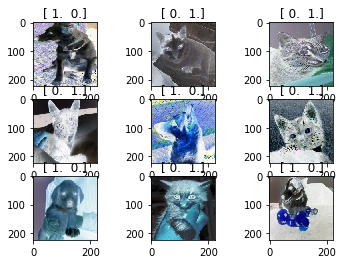

In [136]:
test_imgs,test_labels = next(test_batches)
for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(test_imgs[i,:,:,:]);
    plt.title(test_labels[i])

In [137]:
test_labels = test_labels[:,0]
test_labels

array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.], dtype=float32)

In [138]:
prediction = model.predict_generator(test_batches,steps=2,verbose=0)

In [139]:
prediction

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

In [140]:
vgg16_model = keras.applications.vgg16.VGG16()

In [141]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [142]:
type(vgg16_model)

keras.engine.training.Model

In [143]:
model=Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [144]:
type(model)

keras.models.Sequential

In [145]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [146]:
model.layers.pop()

In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [148]:
for layer in model.layers:
    layer.trainable = False

In [149]:
model.add(Dense(2,activation='softmax'))

In [150]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [151]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [152]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps = 2,epochs=10,verbose=2)

Epoch 1/10
22s - loss: 0.7005 - acc: 0.3413 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/10
24s - loss: 0.6896 - acc: 0.7100 - val_loss: 0.6829 - val_acc: 0.6000
Epoch 3/10
27s - loss: 0.6777 - acc: 0.8250 - val_loss: 0.6816 - val_acc: 0.6500
Epoch 4/10
23s - loss: 0.6704 - acc: 0.9212 - val_loss: 0.6736 - val_acc: 0.7000
Epoch 5/10
28s - loss: 0.6676 - acc: 0.9250 - val_loss: 0.6698 - val_acc: 0.8000
Epoch 6/10
27s - loss: 0.6692 - acc: 0.8938 - val_loss: 0.6651 - val_acc: 0.8000
Epoch 7/10
28s - loss: 0.6594 - acc: 0.9500 - val_loss: 0.6625 - val_acc: 0.8000
Epoch 8/10
24s - loss: 0.6580 - acc: 1.0000 - val_loss: 0.6563 - val_acc: 0.8000
Epoch 9/10
25s - loss: 0.6532 - acc: 0.9737 - val_loss: 0.6556 - val_acc: 0.8000
Epoch 10/10
30s - loss: 0.6437 - acc: 1.0000 - val_loss: 0.6530 - val_acc: 0.8000


In [112]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [153]:
prediction = model.predict_generator(test_batches,steps=1,verbose=1)

1/1 [==============================] - 4s


In [154]:
prediction

array([[ 0.50890815,  0.49109188],
       [ 0.46789601,  0.53210396],
       [ 0.49718368,  0.50281638],
       [ 0.46648943,  0.53351063],
       [ 0.52525526,  0.47474477],
       [ 0.53270262,  0.46729741],
       [ 0.52634907,  0.47365093],
       [ 0.46933424,  0.53066576],
       [ 0.46545801,  0.53454196],
       [ 0.4703494 ,  0.52965063]], dtype=float32)

In [155]:
predict_labes = np.round(prediction[:,0])

In [156]:
cm=confusion_matrix(test_labels,predict_labes)

Confusion matrix, without normalization
[[3 2]
 [2 3]]


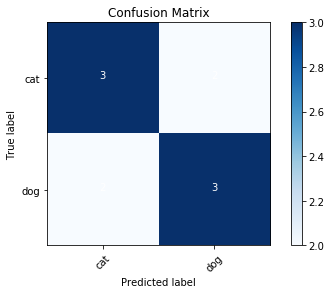

In [125]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')